In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv("vectorized_fw2.csv", index_col=0)
test = pd.read_csv("test_ds_fw2.csv", index_col=0)

In [3]:
wc_t = data["total wc"][0]

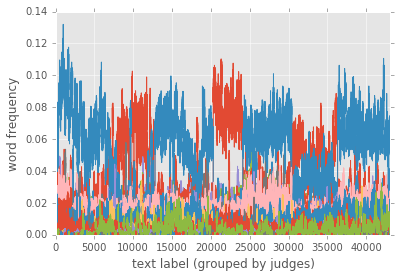

In [4]:
(data.iloc[:,3:]/wc_t).plot(legend = False)
plt.xlabel("text label (grouped by judges)")
plt.ylabel("word frequency")
plt.savefig("freq")

In [5]:
train_x = np.array(data.iloc[:,3:])
train_x = np.nan_to_num(train_x)
train_x = train_x/wc_t
train_y = np.array(data.iloc[:,0])

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=2, criterion = "entropy")

In [8]:
clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
wc = np.array(test["total wc"])
temp = np.array(test.iloc[:,3:])
temp = np.nan_to_num(temp)
test_x = []
for i in range(wc.shape[0]):
    vec = temp[i]/wc[i]
    test_x.append(vec)
test_x = np.array(test_x)

In [10]:
predict = pd.Series(clf.predict(test_x), index=test.file_n)

In [21]:
predict.to_csv("predict.csv", encoding="utf-8")

In [22]:
predict_proba = pd.DataFrame(clf.predict_proba(test_x), index=test.file_n.as_matrix(), columns=clf.classes_)

In [23]:
predict_proba.to_csv("predict_proba.csv", encoding="utf-8")

In [24]:
feature_importances = pd.Series(clf.feature_importances_, index=data.columns[3:])

In [25]:
# feature_importances.sort_values(ascending=False, inplace=True)

In [26]:
feature_importances.to_csv("feature_importances.csv")

In [19]:
pd.read_csv("predict.csv",encoding='utf-8')

,573.0,葉百修
0,574,蔡清遊
1,575,林永謀
2,576,林錫堯
3,577,蔡清遊
4,578,林錫堯
5,579,葉百修
6,580,蔡清遊
7,581,葉百修
8,582,林錫堯
9,583,蔡清遊


In [18]:
pd.read_csv("predict_proba.csv",encoding='utf-8')

,Unnamed: 0,余雪明,城仲模,廖義男,彭鳳至,徐璧湖,曾有田,李震山,林子儀,林永謀,...,蔡清遊,蘇永欽,許宗力,許玉秀,謝在全,賴英照,陳敏,陳新民,陳春生,黃茂榮
0,573,0.00,0.00,0.03,0.02,0.00,0.00,0.03,0.03,0.03,...,0.05,0.01,0.00,0.02,0.05,0.00,0.05,0.00,0.04,0.17
1,574,0.01,0.00,0.05,0.00,0.01,0.00,0.02,0.01,0.10,...,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.06
2,575,0.04,0.01,0.03,0.02,0.00,0.01,0.08,0.01,0.17,...,0.15,0.00,0.01,0.02,0.03,0.00,0.01,0.02,0.01,0.14
3,576,0.00,0.00,0.04,0.00,0.01,0.00,0.02,0.05,0.00,...,0.11,0.00,0.00,0.01,0.02,0.01,0.03,0.00,0.05,0.11
4,577,0.03,0.00,0.03,0.00,0.01,0.00,0.02,0.07,0.10,...,0.21,0.01,0.01,0.00,0.02,0.01,0.00,0.01,0.04,0.13
5,578,0.00,0.00,0.16,0.02,0.00,0.03,0.02,0.03,0.03,...,0.14,0.00,0.00,0.01,0.01,0.05,0.04,0.00,0.04,0.11
6,579,0.00,0.00,0.02,0.02,0.00,0.01,0.07,0.00,0.00,...,0.14,0.00,0.00,0.04,0.02,0.00,0.07,0.00,0.01,0.14
7,580,0.00,0.00,0.00,0.02,0.00,0.00,0.06,0.02,0.02,...,0.24,0.00,0.00,0.08,0.04,0.06,0.02,0.00,0.05,0.06
8,581,0.00,0.00,0.05,0.00,0.00,0.01,0.13,0.02,0.00,...,0.14,0.00,0.04,0.06,0.01,0.03,0.01,0.04,0.05,0.07
9,582,0.00,0.00,0.03,0.02,0.00,0.00,0.09,0.04,0.00,...,0.12,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.01,0.07
